In [1]:
from IPython.display import Audio
from utils.mp import MP

In [2]:
TARGET = "/Users/pm/CloudStation/Drive/ComputerMusicCoding/MatchingPursuit/audio_file/vox.wav"
SOURCE = "/Users/pm/CloudStation/Drive/ComputerMusicCoding/MatchingPursuit/audio_file/classical.wav"
SR = 44100

In [3]:
mpd = MP(target_path=TARGET, source_path=SOURCE, sr=SR)

# create atoms and time-freq dictionary
mpd.generate_atoms(mode="variable", wlenmin=1024, wlenmax=4096, hopsizemin=0.25, hopsizemax=3, n_win=10)

# generaete matching signal
mpd.matching(k=10, eps=1e-6)

# rebuild target
yd = mpd.perform_rebuild()


Generate target atoms...


100%|██████████| 166/166 [00:00<00:00, 14368.80it/s]



Done!

Generate dictionary...



100%|██████████| 10/10 [00:01<00:00,  9.58it/s]



Done!


MATCHING ATOMS...



100%|██████████| 166/166 [00:02<00:00, 60.03it/s]


DONE!



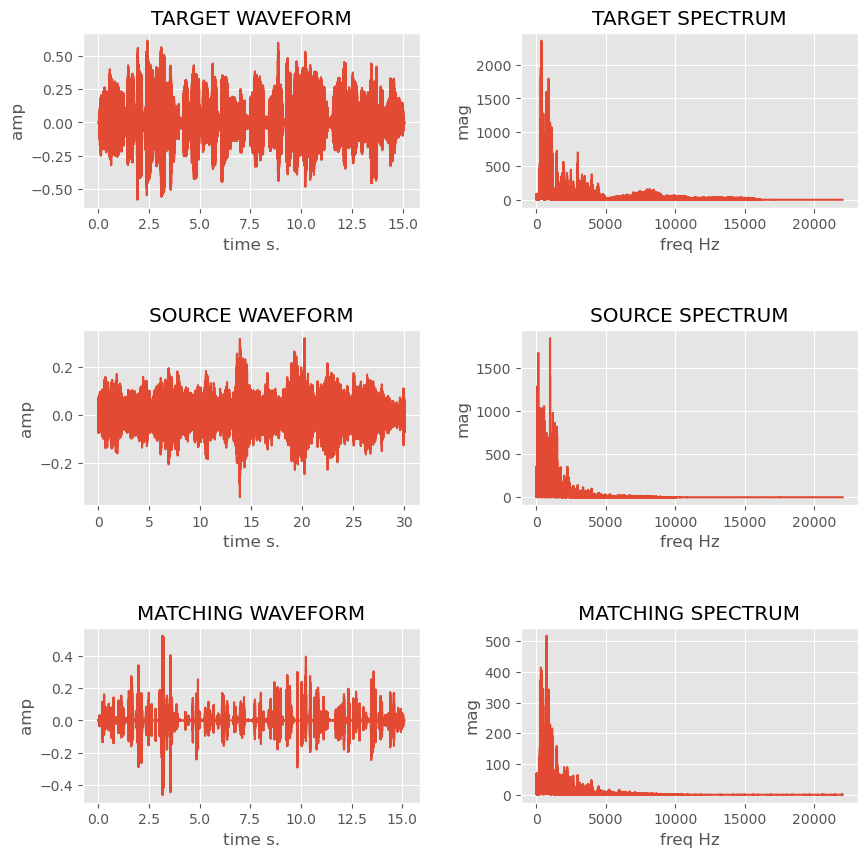

In [4]:
mpd.plot_results()

In [6]:
# target frames
target_atoms = mpd.matching_pursuit.target_atoms

# dictionary
dictionary = mpd.matching_pursuit.dictionary

# coeffs with best index from matching pursuit process
coeffs = mpd.matching_pursuit.coeffs

# atoms with best index from matching pursuit process
atoms = mpd.matching_pursuit.atoms

# matrix result of the product between coeffs and atoms with best index during the process
matching_atoms = mpd.matching_pursuit.matching_atoms

In [5]:
Audio(yd, rate=SR)

In [16]:
mps = MP(target_path=TARGET, source_path=SOURCE, sr=SR)

# create atoms and time-freq dictionary
mps.generate_atoms(mode="static", wlen=1024, hopsize=512, n_win=10)

# generaete matching signal
mps.matching(k=10, eps=1e-6)

# rebuild target
ys = mps.perform_rebuild()


Generate target atoms...


100%|██████████| 72/72 [00:00<00:00, 84496.33it/s]



Done!

Generate dictionary...



100%|██████████| 1/1 [00:00<00:00, 21.19it/s]



Done!


MATCHING ATOMS...



100%|██████████| 72/72 [00:01<00:00, 59.34it/s]


DONE!



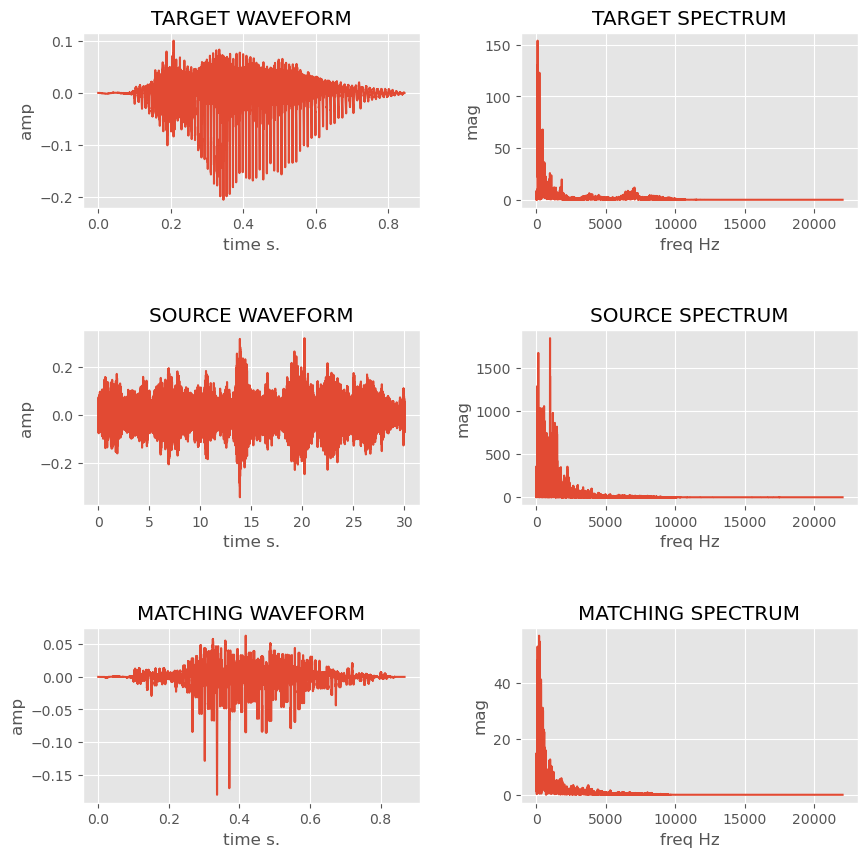

In [18]:
mps.plot_results()

In [19]:
Audio(ys, rate=SR)

In [42]:
import soundfile as sf

sf.write("r1_dinamic.wav", y, SR, "PCM_24")